# 2MASS All-Sky Atlas

This notebook tutorial demonstrates the process of querying IRSA's Simple Image Access (SIA) service for the 2MASS All-Sky Atlas, making a cutout image (thumbnail), and displaying the cutout.

***

## Learning Goals

By the end of this tutorial, you will:

* Learn how to search the NASA Astronomical Virtual Observatory Directory web portal for a service that provides access to IRSA's 2MASS images.
* Use the Python pyvo package to identify which of IRSA's 2MASS images cover a specified coordinate.
* Download one of the identified images.
* Create and display a cutout of the downloaded image.

## Introduction

The Two Micron All Sky Survey (2MASS) project uniformly scanned the entire sky in three near-infrared bands to detect and characterize point sources brighter than about 1 mJy in each band, with signal-to-noise ratio (SNR) greater than 10. More information about 2MASS can be found at:

https://irsa.ipac.caltech.edu/Missions/2mass.html

The [NASA/IPAC Infrared Science Archive (IRSA)](https://irsa.ipac.caltech.edu) at Caltech is the archive for 2MASS images and catalogs. The 2MASS images that are the subject of this tutorial are made accessible via the [International Virtual Observatory Alliance (IVOA)](https://ivoa.net) [Simple Image Access (SIA)](https://wiki.ivoa.net/internal/IVOA/SiaInterface/SIA-V2-Analysis.pdf) protocol. IRSA's 2MASS SIA service is registered in the NASA Astronomical Virtual Observatory (NAVO) [Directory](https://vao.stsci.edu). Based on the registered information, the Python package [pyvo](https://pyvo.readthedocs.io) can be used to query the 2MASS SIA service for a list of images that meet specified criteria, and standard Python libraries can be used to download and manipulate the images.
Other datasets at IRSA are available through other SIA services:

https://irsa.ipac.caltech.edu/docs/program_interface/api_images.html

## Imports

- *pyvo* for querying IRSA's 2MASS SIA service
- *astropy.coordinates* for defining coordinates
- *astropy.nddata* for creating an image cutout
- *astropy.wcs* for interpreting the World Coordinate System header keywords of a fits file
- *astropy.units* for attaching units to numbers passed to the SIA service
- *matplotlib.pyplot* for plotting
- *astropy.utils.data* for downloading files
- *astropy.io* to manipulate FITS files

In [1]:
import pyvo as vo
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
from astropy.io import fits

## Section 1 - Setup

Set images to display in the notebook

In [2]:
%matplotlib inline

Define coordinates of a bright star

In [3]:
ra = 314.30417
dec = 77.595559
pos = SkyCoord(ra=ra, dec=dec, unit='deg')

## Section 2 - Lookup and define a service for 2MASS images

Start at STScI VAO Registry at https://vao.stsci.edu/keyword-search/

Limit by Publisher "NASA/IPAC Infrared Science Archive" and Capability Type "Simple Image Access Protocol" then search on "2MASS"

Locate the SIA URL https://irsa.ipac.caltech.edu/cgi-bin/2MASS/IM/nph-im_sia?type=at&ds=asky&

In [4]:
twomass_service = vo.dal.SIAService("https://irsa.ipac.caltech.edu/cgi-bin/2MASS/IM/nph-im_sia?type=at&ds=asky&")

## Section 3 - Search the service

Search for images covering within 1 arcsecond of the star

In [5]:
im_table = twomass_service.search(pos=pos, size=1.0*u.arcsec)

Examine the table of images that is returned

In [6]:
im_table.to_table()

name,download,center_ra,center_dec,naxes,naxis,scale,format,crpix,crval,crota2,band,bref,bhi,blo,pers_art,glint_art,type,dataset,pixflags,id,scntr,date,hem,scan,image,ut_date,coadd_key,seesh,magzp,msnr10,bin
,,deg,deg,,,deg,,,deg,deg,,meters,meters,meters,,,,,,,,,,,,,,arcseconds,,,
object,object,float64,float64,int32,object,object,object,object,object,float64,object,float64,float64,float64,object,object,object,object,object,object,object,object,object,int32,int32,object,int32,float64,float64,float64,int32
All-Sky Release Survey J-Band Atlas Image: 000616 n 060 0256,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-im?ds=asky&atdir=/ti08&dh=000616n&scan=060&name=ji0600256.fits,314.5216579,77.65369905,2,[512 1024],[-0.0002777777845 0.0002777777845],image/fits,[256.5 512.5],[314.5216579 77.65369905],-0.03194277641,J,1.235e-06,1.404e-06,1.066e-06,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-art?arttype=pers&ds=asky&date=000616&hem=n&scan=060,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-art?arttype=glint&ds=asky&date=000616&hem=n&scan=060,A,asky,CZ,null,null,000616,n,60,256,000616,1388256,2.63965,20.8408,16.567,201030300
All-Sky Release Survey J-Band Atlas Image: 000616 n 060 0256,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-im_key?ds=asky&key=1388256&band=J,314.5216579,77.65369905,2,[512 1024],[-0.0002777777845 0.0002777777845],text/html,[256.5 512.5],[314.5216579 77.65369905],-0.03194277641,J,1.235e-06,1.404e-06,1.066e-06,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-art?arttype=pers&ds=asky&date=000616&hem=n&scan=060,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-art?arttype=glint&ds=asky&date=000616&hem=n&scan=060,A,asky,CZ,null,null,000616,n,60,256,000616,1388256,2.63965,20.8408,16.567,201030300
All-Sky Release Survey H-Band Atlas Image: 000616 n 060 0256,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-im?ds=asky&atdir=/ti08&dh=000616n&scan=060&name=hi0600256.fits,314.5216579,77.65369905,2,[512 1024],[-0.0002777777845 0.0002777777845],image/fits,[256.5 512.5],[314.5216579 77.65369905],-0.03194277641,H,1.662e-06,1.924e-06,1.4e-06,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-art?arttype=pers&ds=asky&date=000616&hem=n&scan=060,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-art?arttype=glint&ds=asky&date=000616&hem=n&scan=060,A,asky,CZ,null,null,000616,n,60,256,000616,1388256,2.6083,20.3352,15.476,201030300
All-Sky Release Survey H-Band Atlas Image: 000616 n 060 0256,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-im_key?ds=asky&key=1388256&band=H,314.5216579,77.65369905,2,[512 1024],[-0.0002777777845 0.0002777777845],text/html,[256.5 512.5],[314.5216579 77.65369905],-0.03194277641,H,1.662e-06,1.924e-06,1.4e-06,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-art?arttype=pers&ds=asky&date=000616&hem=n&scan=060,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-art?arttype=glint&ds=asky&date=000616&hem=n&scan=060,A,asky,CZ,null,null,000616,n,60,256,000616,1388256,2.6083,20.3352,15.476,201030300
All-Sky Release Survey K-Band Atlas Image: 000616 n 060 0256,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-im?ds=asky&atdir=/ti08&dh=000616n&scan=060&name=ki0600256.fits,314.5216579,77.65369905,2,[512 1024],[-0.0002777777845 0.0002777777845],image/fits,[256.5 512.5],[314.5216579 77.65369905],-0.03194277641,K,2.159e-06,2.434e-06,1.884e-06,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-art?arttype=pers&ds=asky&date=000616&hem=n&scan=060,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-art?arttype=glint&ds=asky&date=000616&hem=n&scan=060,A,asky,CZ,null,null,000616,n,60,256,000616,1388256,2.70235,20.0396,14.709,201030300
All-Sky Release Survey K-Band Atlas Image: 000616 n 060 0256,https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-im_key?ds=asky&key=1388256&band=K,314.5216579,77.65369905,2,[512 1024],[-0.0002777777845 0.0002777777845],text/html,[256.5 512.5],[314.5216579 77.65369905],-0.03194277641,K,2.159e-06,2.434e-06,1.884e

## Section 4 - Locate and download an image of interest

Locate the first H-band image and display its URL

In [7]:
for i in range(len(im_table)):
    if im_table[i]['band'] == 'H':
        break
print(im_table[i].getdataurl())

https://irsa.ipac.caltech.edu:443/cgi-bin/2MASS/IM/nph-im?ds=asky&atdir=/ti08&dh=000616n&scan=060&name=hi0600256.fits


Download the image and open it in Astropy

In [8]:
fname = download_file(im_table[i].getdataurl(), cache=True)
image1 = fits.open(fname)

## Section 5 - Extract a cutout and plot it

In [9]:
wcs = WCS(image1[0].header)

In [10]:
cutout = Cutout2D(image1[0].data, pos, (60, 60), wcs=wcs)
wcs = cutout.wcs

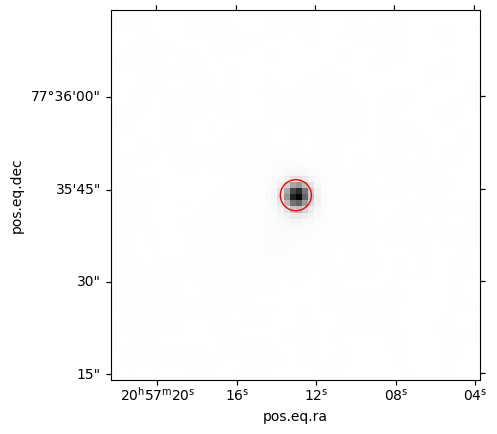

In [11]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(cutout.data, cmap='gray_r', origin='lower',
          vmax = 1000)
ax.scatter(ra, dec, transform=ax.get_transform('fk5'), s=500, edgecolor='red', facecolor='none')

## Exercise

Repeat the steps above to retrieve a cutout from the AllWISE Atlas images

***

## About this notebook

**Author:** David Shupe, IRSA Scientist, and the IRSA Science Team

**Updated On:** 2023-02-16

**Contact:** irsasupport@ipac.caltech.edu or https://jira.ipac.caltech.edu/irsasupport

## Citations

If you use `astropy` for published research, please cite the authors. Follow these links for more information about citing `astropy`:

* [Citing `astropy`](https://www.astropy.org/acknowledging.html)

If you use 2MASS data in published research, please cite the canonical paper [Skrutskie et al (2006)](http://adsabs.harvard.edu/abs/2006AJ....131.1163S), and include the following standard acknowledgment:

*"This publication makes use of data products from the Two Micron All Sky Survey, which is a joint project of the University of Massachusetts and the Infrared Processing and Analysis Center/California Institute of Technology, funded by the National Aeronautics and Space Administration and the National Science Foundation."*

Please also cite the doi for the 2MASS All-Sky Atlas Image Service at https://www.ipac.caltech.edu/doi/irsa/10.26131/IRSA121